In [11]:
import numpy as np
import math as m
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Problem 1


In [12]:
def suvajit_random(n1,n2):
    x = np.random.rand()
    return np.round(n1+ (n2-n1)*x)
suvajit_random(1,20)

7.0

# Problem 2

In [13]:
def meeting_probability(N):
    meet = 0
    '''The function simulates N instances of two individuals arriving at a location with random arrival times.
For each instance:
1. Random arrival times (tA and tB) are generated for both individuals.
2. If the difference between the arrival times is within a certain threshold (5 minutes if tA < tB, 10 minutes otherwise),
   it is considered a meeting.
3. The function calculates the total number of meetings and returns the probability by dividing the number of meetings by N.'''


    for i in range(N+1):
        # Generate random arrival time for individual A and B
        tA = 30*np.random.rand()
        tB = 30*np.random.rand()

        if tA<tB:
            if tB-tA<5:
                meet += 1
        else:
            if tA-tB<10:
                meet  += 1
    return meet/N


n = int(input('No of happened instances:'))
print('Probability of their meeting:',meeting_probability(n))


No of happened instances:10000
Probability of their meeting: 0.4362


# Problem 4

In [14]:
# Part a
def take_a_step():
    if np.random.rand()<0.5:
        return -1
    return 1


def xn(steps):
    path = np.zeros(steps)
    pos = 0; k = 0
    for s in range(steps):
        path[k] = pos
        pos += take_a_step()
        k += 1
    return pos # Giving final position after 50 steps

Text(0.5, 1.0, 'Random Walk Simulation Frequency Distribution')

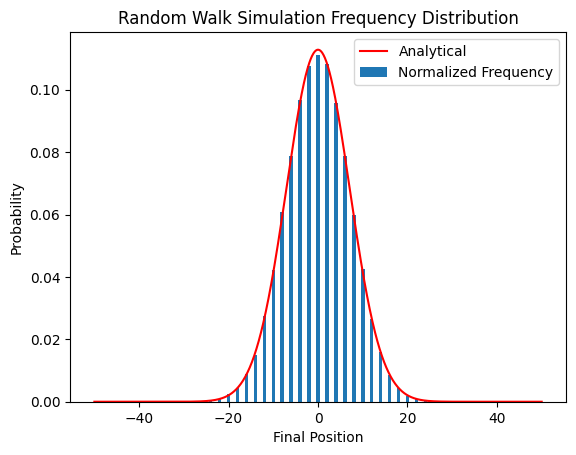

In [22]:
# Part B
# Parameters

N =  100000
steps = 50

xl = np.linspace(-steps,steps,1000)


def exact(x,n):
    t = np.exp(-(x**2)/(2*n))
    s= 2/(np.sqrt(2*np.pi*n))
    return np.array((s*t))
yl = exact(xl,steps)

final_position = np.arange(-steps,steps+2,2)  # N+1 possible position array
frequency= np.zeros_like(final_position) #  an array of size N + 1 to store the occurences of a particular position


# Part C

for i in range(N+1):
    random_final_position = xn(steps)
    position = np.where(final_position==random_final_position)

    frequency[position] +=1 # adding +1 to the frequency of the final position in this i th step out of N = 100000
total_frequency = np.sum(frequency)


# Plotting
plt.bar(final_position,frequency/total_frequency)
plt.plot(xl,yl,color='red')
plt.legend(['Analytical','Normalized Frequency'])
plt.xlabel('Final Position')
plt.ylabel('Probability')
plt.title('Random Walk Simulation Frequency Distribution')




Documentation:
---
*Agreement*: Overall, there is good agreement between the simulated results and the theoretical predictions.
The similarity between the two distributions indicates that the simulation accurately captures the probabilistic behavior of the random walk
process. Also the peak aligns with the center of the distribution, as predicted by the theoretical formula.


---


*Randomness*: Despite the deterministic nature of the simulation, the
resulting distribution exhibits randomness due to the probabilistic nature
 of the random walk process. This randomness is reflected in the variability of final positions observed in the simulation.


---


*Convergence*: As the number of walks (N) increases, the normalized frequency distribution converges towards the theoretical distribution,
indicating that the simulation results become increasingly representative of the true probabilistic behavior of the random walk process.

# Problem 5

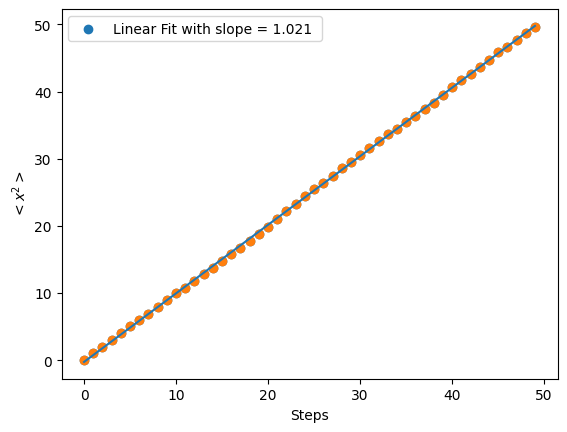

In [16]:
def x2(steps):
    path = np.zeros(steps)
    pos = 0; k = 0
    for s in range(steps):
        path[k] = pos**2
        pos += take_a_step()

        k += 1
    return path # Giving a list where i th element is = position^2 after i the step

# Parameters
N = 10000
steps = 50

# Simulate multiple random walks and store the squared positions in a matrix

matrix = np.zeros(shape=(N,steps))
for i in range(N):
    list = x2(steps)
    matrix[i,:] = list
x2_mean = np.mean(matrix, axis=0)

# Taking average of coloumns of this matrix gives average x**2 for each step

step = np.arange(0,steps,1)

# Plotting
plt.scatter(step,x2_mean)
plt.ylabel('$ <x^2> $')
plt.xlabel('Steps')

 # Fitting

def eq_fit(x,p0,p1):
    return p0*x+p1
param1, cov1=curve_fit(eq_fit,step, x2_mean, p0=[1.0,1.0]) # Fitting the euler method
plt.scatter(step, x2_mean)
plt.plot(step,eq_fit(step,param1[0],param1[1]))
plt.legend([f'Linear Fit with slope = {round(param1[0],3)} '])



# Problem 3

In [23]:

n=1000000

print("Enter the length: ")
l=int(input())
print("Enter the width: ")
d=int(input())

count=0

for i in range(n):
    y = np.random.uniform(0,d,1)
    theta = np.random.uniform(-np.pi/2,np.pi/2,1)

    if l*np.cos(theta)>d-y:
        count +=1
    '''If the x-coordinate of the point (l * cos(θ)) is greater than the distance from the right edge of the rectangle (d - y),
   then the point is considered to be inside the region of interest (a quarter of a circle inscribed in the rectangle).'''

prob=count/n
print("The Probability of Crossing is: ",prob)
pi_value= (2*l)/(d*prob) # formula for only l < d

print('value of pi:',pi_value)
# This code works for both l>=d and l<d

Enter the length: 
1
Enter the width: 
2
The Probability of Crossing is:  0.318461
value of pi: 3.1401019277085735
